In [2]:
# Rotete kode, men er bare for å visualisere

import numpy as np
import matplotlib.pyplot as plt
import sys


In [3]:

c = 3e8 # [m/s] lysfart

K = -1/c # konstant
A = 1.5 # [m] høyde på kappe
sigma = 0.3
y = lambda x: A / (sigma * np.sqrt(2*np.pi)) * np.exp(- x**2 / (2*sigma**2))
yder = lambda x: -x/(sigma)**2 * y(x)

x0 = -1
theta0 = np.pi/4
theta_ = - np.arctan(yder(x0))
n0 = np.sin(theta0) / np.sin(theta_)
print(n0)


-8.282909417825138


In [6]:

def ref_index(x, y=y, yder=yder):
    K = 1/c * n0 *yder(x0) / np.sqrt(1+yder(x0)**2)

    n = lambda x: c * K * np.sqrt(1+yder(x)**2) / yder(x)

    N = n(x)

    #N[np.abs(N)>5] = 1
    N[np.abs(x)<0.002] = 0

    return N


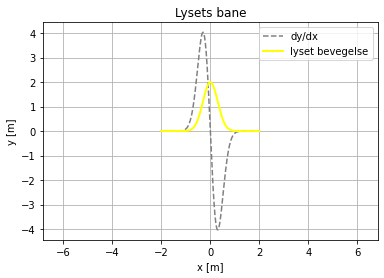

Text(0, 0.5, 'n(x)')

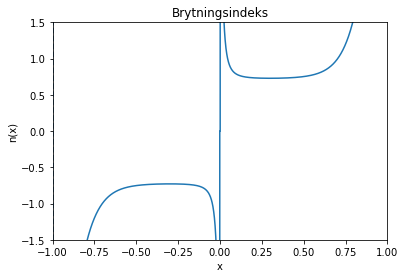

In [5]:
x = np.linspace(-2, 2, 5000)
plt.plot(x, yder(x), c='grey', ls='--', label='dy/dx')
plt.plot(x, y(x), c='yellow', lw=2, label='lyset bevegelse')
plt.axis('equal')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Lysets bane')
plt.legend()
plt.grid('--')
plt.show()


n1 = ref_index(x)
plt.plot(x,n1)
plt.title('Brytningsindeks')
plt.axvline(x0, ls='--')
plt.axis([x0, -x0, -1.5, 1.5])
plt.xlabel('x')
plt.ylabel('n(x)')